# <a id="#">Task 3 – Mean, median, and Gaussian filtering</a>

In [1]:
import numpy
import matplotlib.pyplot as plt

---

## Linear filtering by convolution (mean filter)

**<a id="#">Task 3.1.1.</a>** Load the image `data/astronaut.png` and show it:

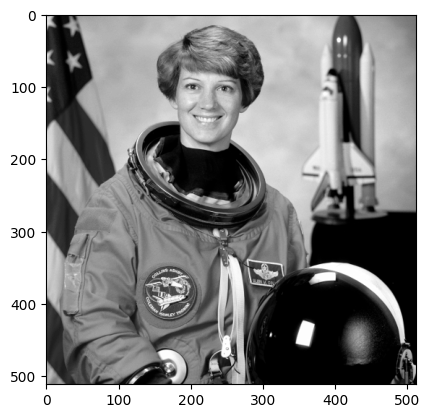

In [2]:
img = plt.imread("data/astronaut.png")

plt.figure()
plt.imshow(img, 'gray')

**<a id="#">Task 3.1.2.</a>** Implement a mean filter:

In [3]:
def meanfilter(img_in, size):
    result = numpy.zeros(img_in.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img_in.shape):
        neighborhood_sum = 0
        if p[0] not in list(range(n)) + list(range(img_in.shape[1] - n,img_in.shape[1])) and p[1] not in list(range(n)) + list(range(img_in.shape[0] - n,img_in.shape[0])):
            for q in numpy.ndindex(size, size):
                neighborhood_sum += img_in[p[0] - n + q[0]][p[1] - n + q[1]]
        result[p] = neighborhood_sum / (size ** 2)
    return result

**<a id="#">Task 3.1.3.</a>** Test your implementation from above by using the function `meanfilter` for the previously loaded image and show the result:

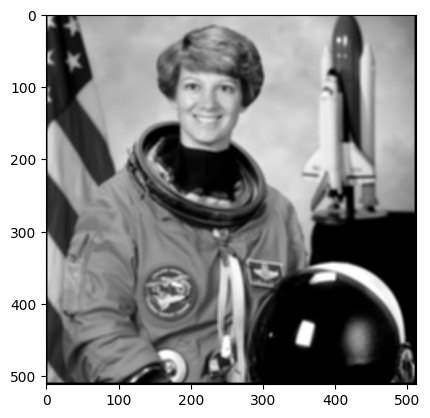

In [4]:
plt.imshow(meanfilter(img, 5), 'gray')

**<a id="#">Task 3.1.4.</a>** Compare your result for filter size `5` with the correct result image `data/astronaut_meanfilter5.png`:

In [5]:
img2 = plt.imread("data/astronaut_meanfilter5.png")
assert numpy.allclose(meanfilter(img, 5), img2, atol=1/255)

---

## Non-linear filtering

**<a id="#">Task 3.2.1.</a>** Implement a median filter:

In [ ]:
def medianfilter(img_in, size):
    result = numpy.zeros(img_in.shape)
    
    n = (size - 1) // 2
    for p in numpy.ndindex(img_in.shape):
        neighborhood_list = []
        if p[0] not in list(range(n)) + list(range(img_in.shape[1] - n,img_in.shape[1])) and p[1] not in list(range(n)) + list(range(img_in.shape[0] - n,img_in.shape[0])):
            for q in numpy.ndindex(size, size):
                neighborhood_list.append(img_in[p[0] - n + q[0]][p[1] - n + q[1]])
        else:
            for q in numpy.ndindex(size, size):
                neighborhood_list.append(0)
        #if p[0] == 1 and p[1] == 1:
            #print(img_in[p])
            #print(neighborhood_list)
            #print(sorted(neighborhood_list)[((size**2) // 2) + 1])
        result[p] = sorted(neighborhood_list)[((size**2) // 2) + 1]

    return result

**<a id="#">Task 3.2.2.</a>** First, test your implementation from above by using the function `medianfilter` for the previously loaded image and show the result:

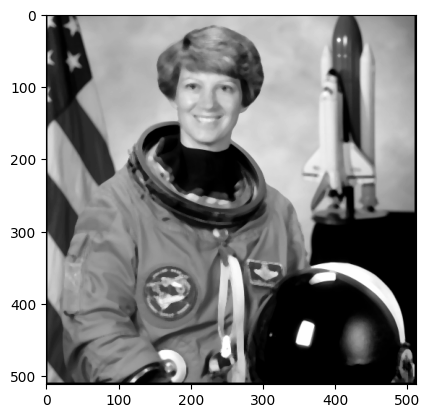

In [22]:
plt.imshow(medianfilter(img, 5), 'gray')

Then, compare your result for filter size `5` with the correct result image `data/astronaut_medianfilter5.png`:

In [36]:
img3 = plt.imread("data/astronaut_medianfilter5.png")
#print(img3[1][1])

for p in numpy.ndindex(img3.shape):
    if img3[p] != medianfilter(img, 5)[p]:
        print(p)

#assert numpy.allclose(medianfilter(img, 5), img3, atol=1/255)

KeyboardInterrupt: 

---

## Using pre-implemented filters

**<a id="#">Task 3.3.1.</a>** Load the package `scipy.ndimage`:

**<a id="#">Task 3.3.2 (a).</a>** Apply a **mean filter** from `scipy.ndimage` to the loaded image:

**<a id="#">Task 3.3.2 (b).</a>** Apply a **median filter** from `scipy.ndimage` to the loaded image:

**<a id="#">Task 3.3.2 (c).</a>** Apply a **Gaussian filter** from `scipy.ndimage` to the loaded image:

**<a id="#">Task 3.3.3.</a>** Compare the results obtained using the functions from `scipy.ndimage` with those you obtained using your own implementations. What are the main differences? Do you have an explanation?

---

## Slicing and benchmarking

**<a id="#">Task 3.4.2.</a>** Implement either a mean filter or a median filter using only a single `for`-loop:

In [ ]:
def fastfilter(img_in, size):
    ...

**<a id="#">Task 3.4.3.</a>** First, test your implementation from above by using the function `fastfilter` for the previously loaded image and show the result:

Then, compare your result to those obtained using your implementation for either `meanfilter` or `medianfilter`, respectively:

**<a id="#">Task 3.4.4.</a>** Benchmark the code run times:

**<a id="#">Task 3.4.5.</a>** Document your observations regarding the benchmarking results and try to think of an explanation: